Link Dataset: https://www.kaggle.com/datasets/ranitsarkar01/porter-delivery-time-estimation/data

CRISP-DM FRAMEWORK:
1. Business Understanding ( Wajib semua pahamin konteks bisnisnya )
2. Data Understanding ( Wajib semua pahamin konteks datanya )
3. Data Preprocessing
  - EDA ( Shanata ) ( 24 - 26 Agustus )
  - Data Cleaning ( Dandi ) ( 27 - 28 Agustus )
  - Data Scaling, sekalian bagi feature target sama train split ( Asiyah ) ( 29 Agustus )
4. Modeling
  - Model selection ( Iqbal ) ( 30 Agustus )
  - hyperparameter tuning ( Danu ) ( 31 Agustus )
5. Evaluating ( Zakki ) ( 1 September )
6. Deployment ( Syifa ) ( 1 - 3 September )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
df=pd.read_csv('/content/dataset.csv')

In [ ]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17445,2.0,2015-02-15 03:32:12,2015-02-15 04:39:37,816b112c6105b3ebd537828a39af4818,mexican,1.0,2.0,1965.0,2.0,695.0,995.0,94.0,92.0,150.0
17446,2.0,2015-02-04 23:27:23,2015-02-04 23:53:39,816b112c6105b3ebd537828a39af4818,mexican,1.0,2.0,1915.0,2.0,625.0,940.0,20.0,22.0,23.0
17447,2.0,2015-01-28 23:01:04,2015-01-28 23:45:36,816b112c6105b3ebd537828a39af4818,mexican,1.0,9.0,5405.0,4.0,375.0,995.0,17.0,15.0,15.0
17448,2.0,2015-01-22 02:29:07,2015-01-22 03:25:29,816b112c6105b3ebd537828a39af4818,mexican,1.0,3.0,3414.0,3.0,1098.0,1126.0,92.0,84.0,122.0


# EDA

In [ ]:
df.shape

(17450, 14)

In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

- market id: integer id for the market where the restaurant lies

- created at: the timestamp at which the order was placed

- actual delivery time: the timestamp when the order was delivered

- store_primary_category: category for the restaurant

- order protocol: integer code value for order protocol(how the  order was placed le: through porter, call to restaurant, pre booked, third part etc)

- total items subtotal: final price of the order

- num_distinct items: the number of distinct items in the order

- min_item_price: price of the cheapest item in the order

- max_item_price: price of the costliest item in order

- total_onshift_partners: number of delivery partners on duty at the time order was placed

- total_busy_partners: number of delivery partners attending to other tasks

- total outstanding_orders: total number of orders to be fulfilled at the moment

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17450 entries, 0 to 17449
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   market_id                 17364 non-null  float64
 1   created_at                17450 non-null  object 
 2   actual_delivery_time      17447 non-null  object 
 3   store_id                  17449 non-null  object 
 4   store_primary_category    16993 non-null  object 
 5   order_protocol            17363 non-null  float64
 6   total_items               17449 non-null  float64
 7   subtotal                  17449 non-null  float64
 8   num_distinct_items        17449 non-null  float64
 9   min_item_price            17449 non-null  float64
 10  max_item_price            17449 non-null  float64
 11  total_onshift_partners    16074 non-null  float64
 12  total_busy_partners       16074 non-null  float64
 13  total_outstanding_orders  16074 non-null  float64
dtypes: flo

In [ ]:
df.isna().sum()

,0
market_id,86
created_at,0
actual_delivery_time,3
store_id,1
store_primary_category,457
order_protocol,87
total_items,1
subtotal,1
num_distinct_items,1
min_item_price,1


In [ ]:
df.tail(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
17440,2.0,2015-01-31 01:39:55,2015-01-31 03:09:59,816b112c6105b3ebd537828a39af4818,mexican,1.0,1.0,1040.0,1.0,1040.0,1040.0,108.0,78.0,147.0
17441,2.0,2015-01-24 01:47:19,2015-01-24 02:45:13,816b112c6105b3ebd537828a39af4818,mexican,1.0,6.0,4810.0,6.0,295.0,1150.0,88.0,82.0,119.0
17442,2.0,2015-02-05 20:18:56,2015-02-05 21:07:26,816b112c6105b3ebd537828a39af4818,mexican,1.0,4.0,4105.0,3.0,940.0,1030.0,40.0,41.0,68.0
17443,2.0,2015-02-18 04:03:53,2015-02-18 04:49:06,816b112c6105b3ebd537828a39af4818,mexican,1.0,19.0,9835.0,8.0,295.0,1150.0,58.0,43.0,50.0
17444,2.0,2015-01-31 01:44:45,2015-01-31 03:03:44,816b112c6105b3ebd537828a39af4818,mexican,1.0,5.0,3750.0,4.0,395.0,1040.0,105.0,78.0,154.0
17445,2.0,2015-02-15 03:32:12,2015-02-15 04:39:37,816b112c6105b3ebd537828a39af4818,mexican,1.0,2.0,1965.0,2.0,695.0,995.0,94.0,92.0,150.0
17446,2.0,2015-02-04 23:27:23,2015-02-04 23:53:39,816b112c6105b3ebd537828a39af4818,mexican,1.0,2.0,1915.0,2.0,625.0,940.0,20.0,22.0,23.0
17447,2.0,2015-01-28 23:01:04,2015-01-28 23:45:36,816b112c6105b3ebd537828a39af4818,mexican,1.0,9.0,5405.0,4.0,375.0,995.0,17.0,15.0,15.0
17448,2.0,2015-01-22 02:29:07,2015-01-22 03:25:29,816b112c6105b3ebd537828a39af4818,mexican,1.0,3.0,3414.0,3.0,1098.0,1126.0,92.0,84.0,122.0
17449,2.0,2015-02-09 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

,0
market_id,float64
created_at,object
actual_delivery_time,object
store_id,object
store_primary_category,object
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


In [ ]:
data=df.copy()

In [ ]:
data.dropna(subset=['actual_delivery_time'], inplace=True)

In [ ]:
data.isna().any()

,0
market_id,True
created_at,False
actual_delivery_time,False
store_id,False
store_primary_category,True
order_protocol,True
total_items,False
subtotal,False
num_distinct_items,False
min_item_price,False


In [ ]:
data.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,17361.000000,17361.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,16072.000000,16072.000000,16072.000000
mean,2.958067,2.772133,3.339600,2709.822548,2.755030,666.904683,1165.946294,43.046727,40.244774,55.872325
std,1.499798,1.464137,2.748368,1843.596457,1.665805,533.806169,585.933793,34.232853,32.086771,52.159309
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,85.000000,-2.000000,-1.000000,-2.000000
25%,2.000000,1.000000,2.000000,1420.000000,2.000000,285.000000,799.000000,15.000000,13.000000,15.000000
50%,3.000000,3.000000,3.000000,2244.000000,2.000000,550.000000,1095.000000,34.000000,33.000000,38.000000
75%,4.000000,4.000000,4.000000,3436.000000,4.000000,900.000000,1400.000000,63.000000,61.000000,82.250000
max,6.000000,6.000000,57.000000,18370.000000,20.000000,7475.000000,8500.000000,160.000000,153.000000,276.000000


In [ ]:
data['created_at']=pd.to_datetime(data['created_at'])

In [ ]:
data['actual_delivery_time']=pd.to_datetime(data['actual_delivery_time'])

In [ ]:
data.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


In [ ]:
data['processing_time']=data['actual_delivery_time']-data['created_at']

In [ ]:
#satuan menit
data['processing_time'] = data['processing_time'].dt.total_seconds() / 60

In [ ]:
data['total_available_partners']=data['total_onshift_partners']-data['total_busy_partners']

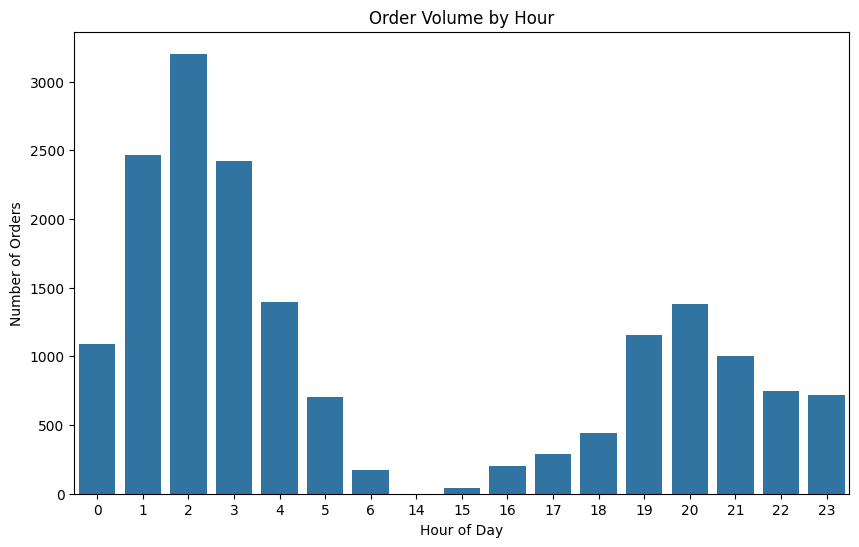

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['created_at'].dt.hour)
plt.title('Order Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

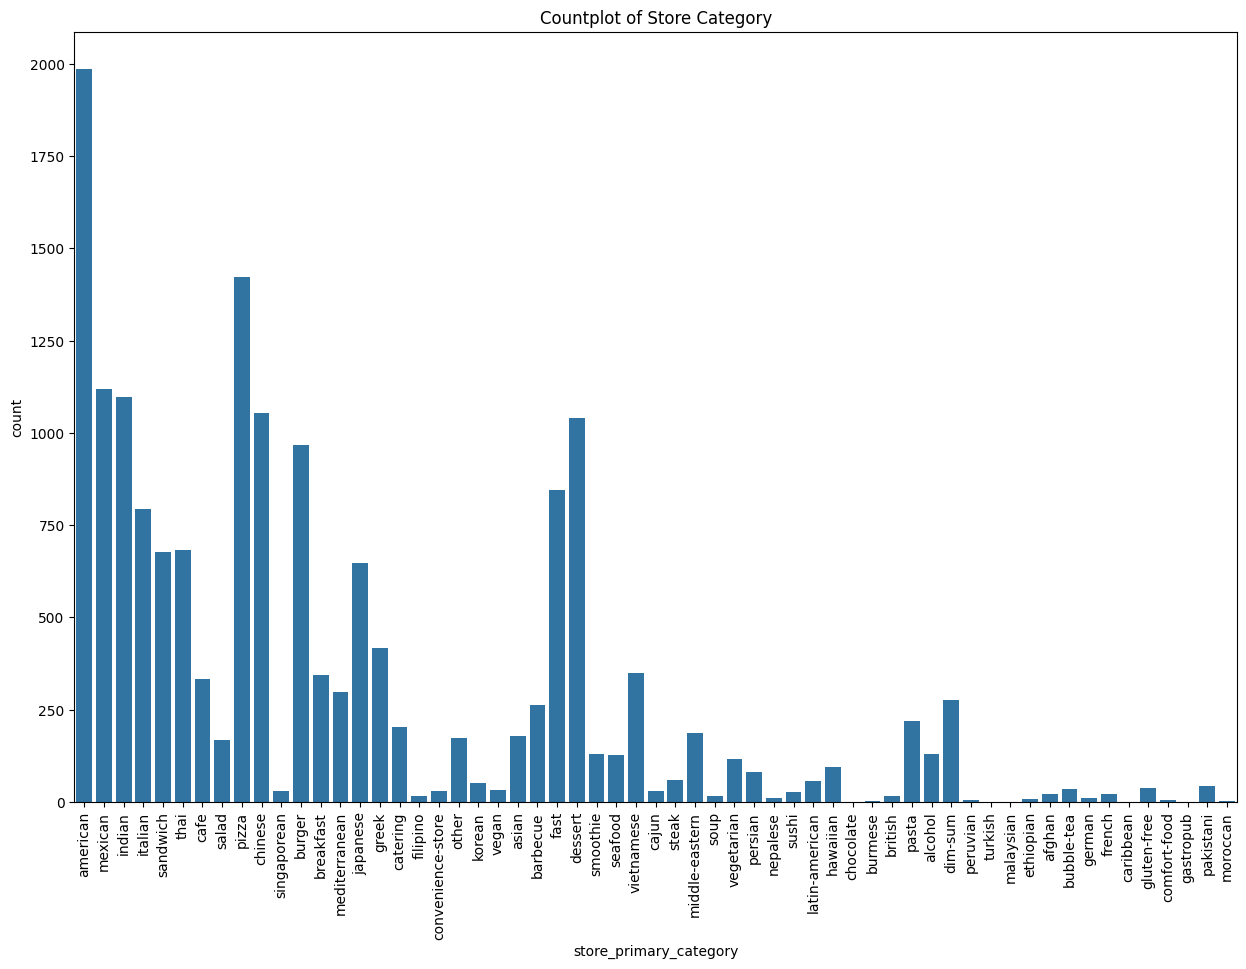

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['store_primary_category'])
plt.title('Countplot of Store Category')
plt.xticks(rotation=90)
plt.show()

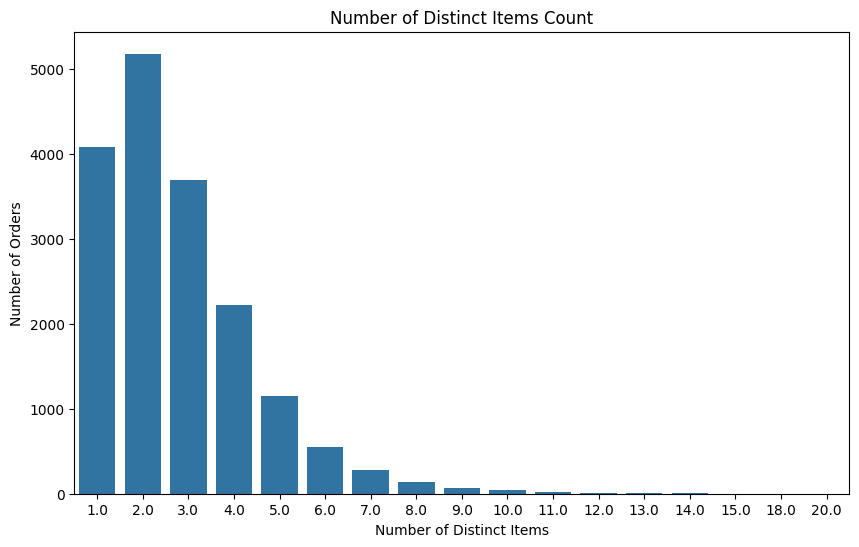

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['num_distinct_items'])
plt.title('Number of Distinct Items Count')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Number of Orders')
plt.show()

<Axes: xlabel='processing_time', ylabel='Density'>

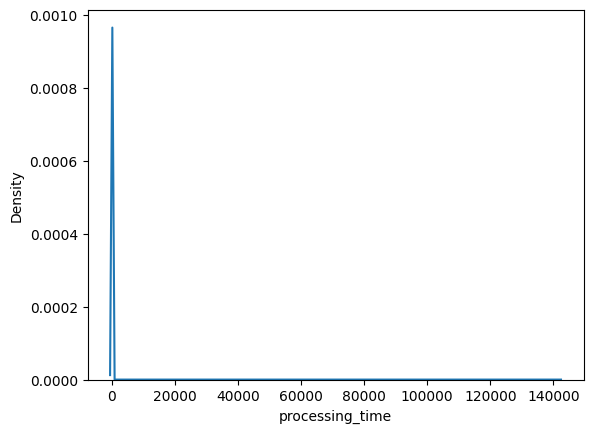

In [ ]:
sns.kdeplot(data=data, x="processing_time")

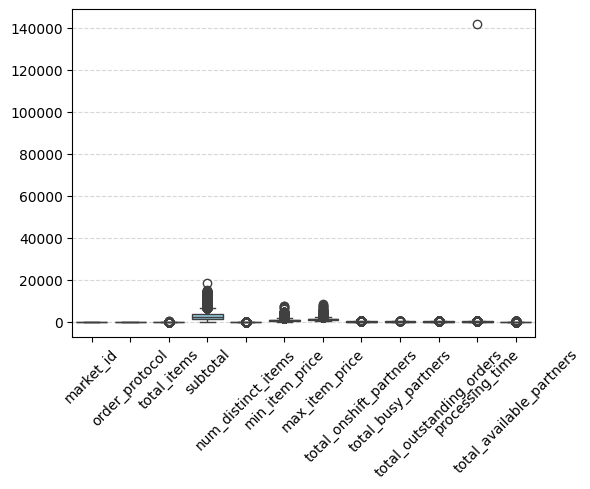

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=data, color='skyblue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

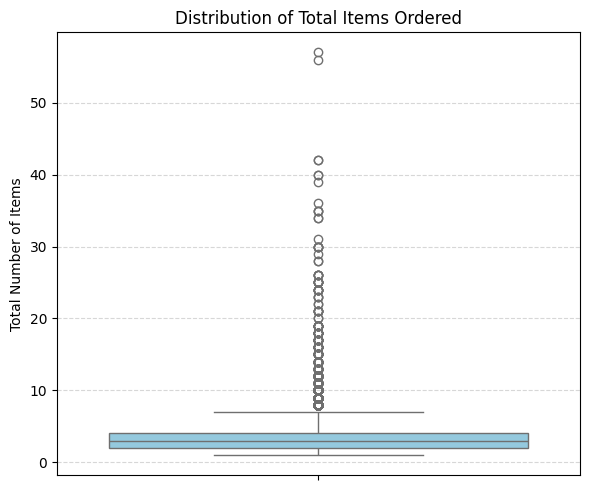

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['total_items'], color='skyblue')
plt.title('Distribution of Total Items Ordered')
plt.ylabel('Total Number of Items')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

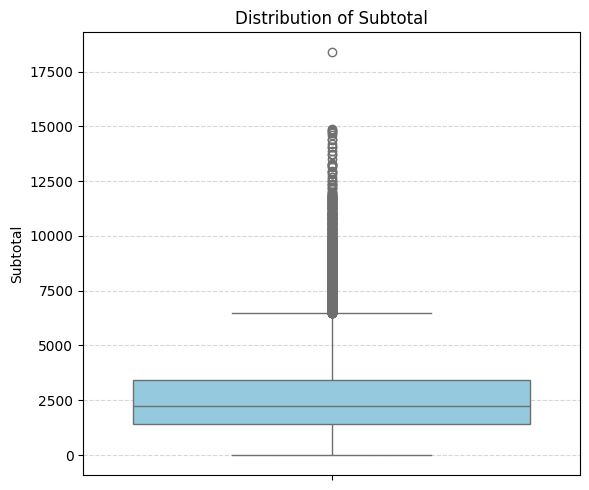

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['subtotal'], color='skyblue')
plt.title('Distribution of Subtotal')
plt.ylabel('Subtotal')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

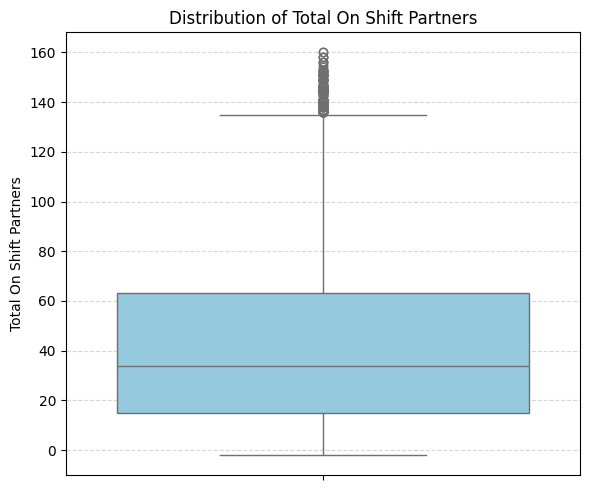

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['total_onshift_partners'], color='skyblue')
plt.title('Distribution of Total On Shift Partners')
plt.ylabel('Total On Shift Partners')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

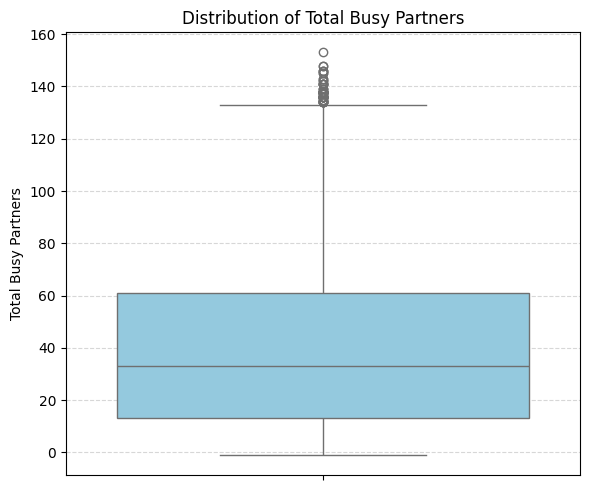

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['total_busy_partners'], color='skyblue')
plt.title('Distribution of Total Busy Partners')
plt.ylabel('Total Busy Partners')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

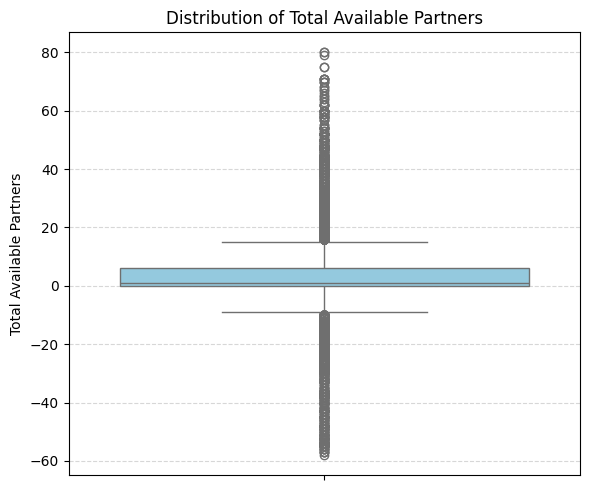

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['total_available_partners'], color='skyblue')
plt.title('Distribution of Total Available Partners')
plt.ylabel('Total Available Partners')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

minus???

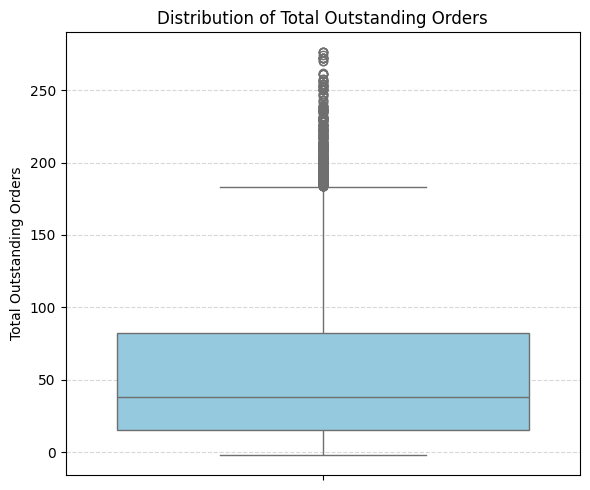

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['total_outstanding_orders'], color='skyblue')
plt.title('Distribution of Total Outstanding Orders')
plt.ylabel('Total Outstanding Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

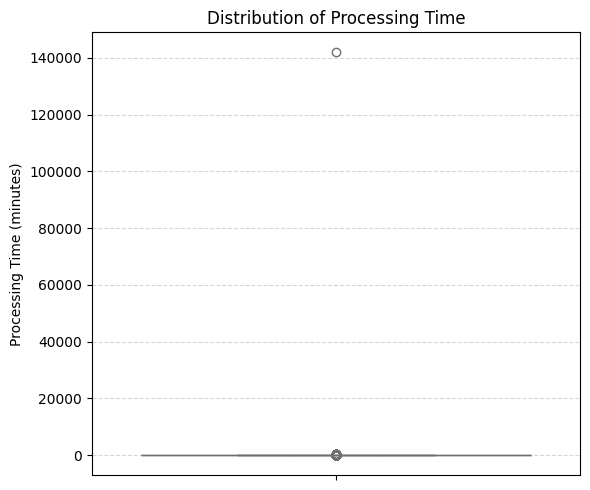

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['processing_time'], color='skyblue')
plt.title('Distribution of Processing Time')
plt.ylabel('Processing Time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Need to treat outlier

In [ ]:
Q1=data['processing_time'].quantile(0.25)
Q3=data['processing_time'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
upper_array = data[data['processing_time'] > upper_bound].index
lower_array = data[data['processing_time'] < lower_bound].index

data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

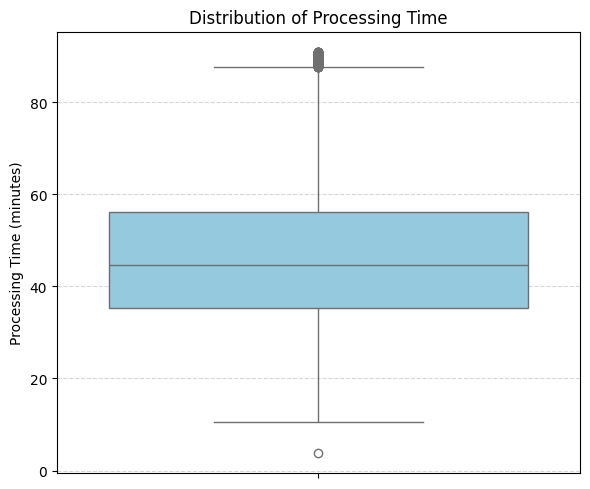

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['processing_time'], color='skyblue')
plt.title('Distribution of Processing Time')
plt.ylabel('Processing Time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

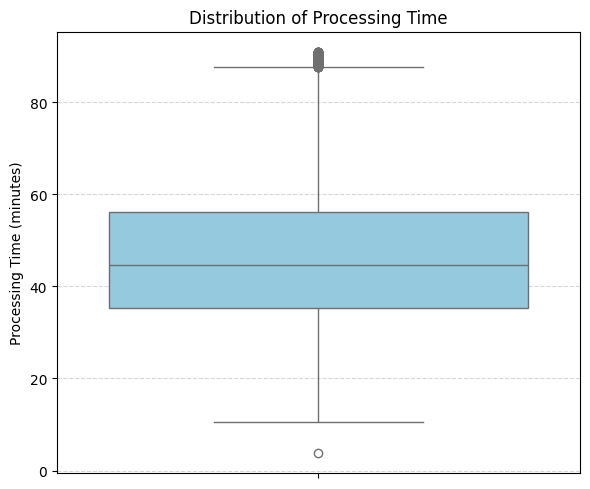

In [ ]:
plt.figure(figsize=(6, 5))

sns.boxplot(y=data['processing_time'], color='skyblue')
plt.title('Distribution of Processing Time')
plt.ylabel('Processing Time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

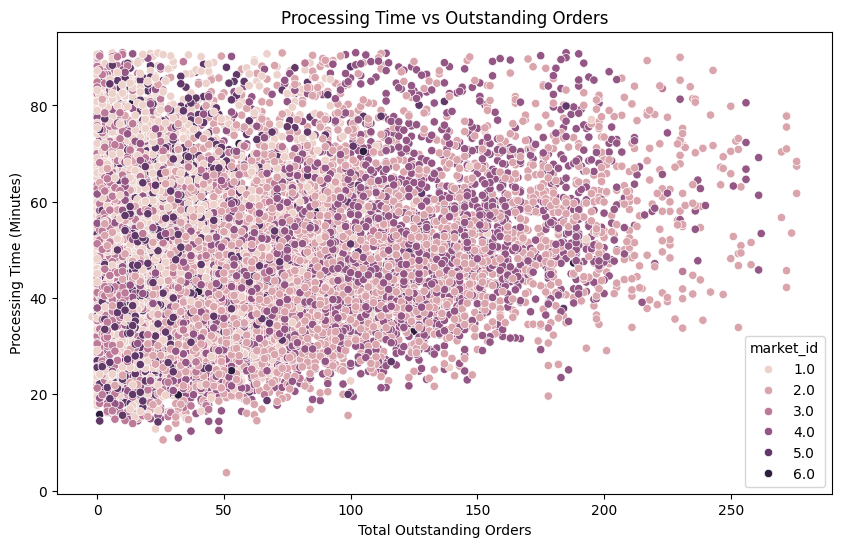

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_outstanding_orders', y='processing_time', data=data, hue='market_id')
plt.title('Processing Time vs Outstanding Orders')
plt.xlabel('Total Outstanding Orders')
plt.ylabel('Processing Time (Minutes)')
plt.show()

No correlation

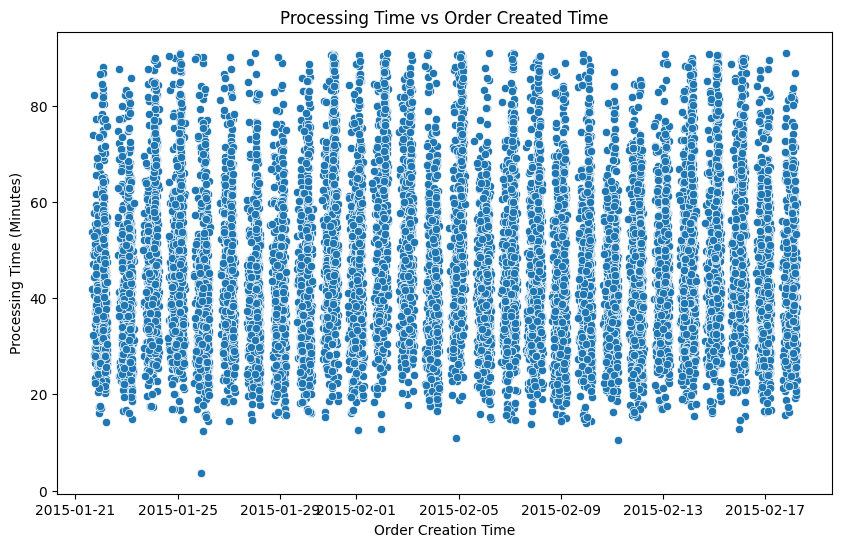

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='created_at', y='processing_time', data=data)
plt.title('Processing Time vs Order Created Time')
plt.xlabel('Order Creation Time')
plt.ylabel('Processing Time (Minutes)')
plt.show()

No Correlation

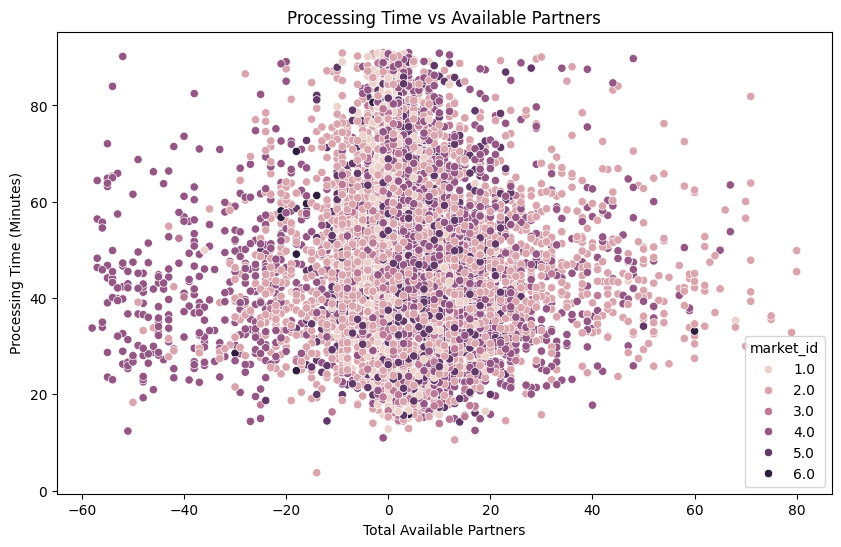

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_available_partners', y='processing_time', data=data, hue='market_id')
plt.title('Processing Time vs Available Partners')
plt.xlabel('Total Available Partners')
plt.ylabel('Processing Time (Minutes)')
plt.show()

No correlation

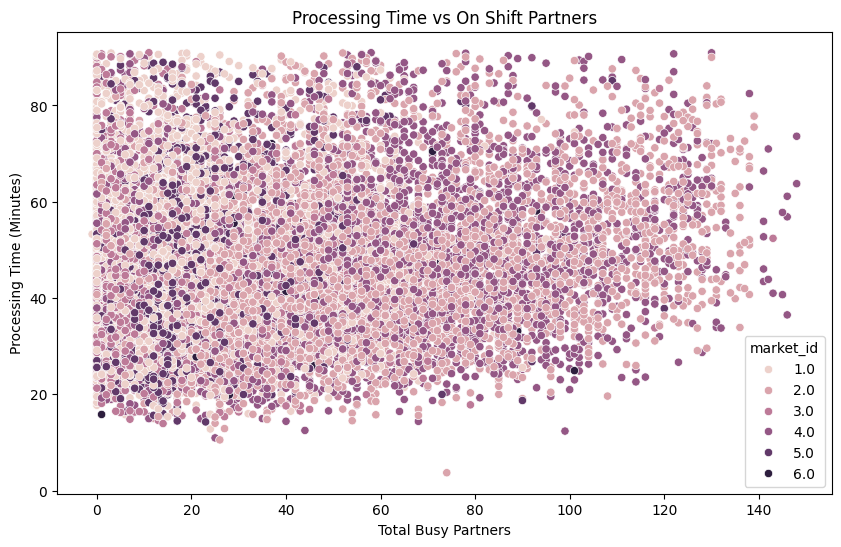

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_busy_partners', y='processing_time', data=data, hue='market_id')
plt.title('Processing Time vs On Shift Partners')
plt.xlabel('Total Busy Partners')
plt.ylabel('Processing Time (Minutes)')
plt.show()

No Correlation

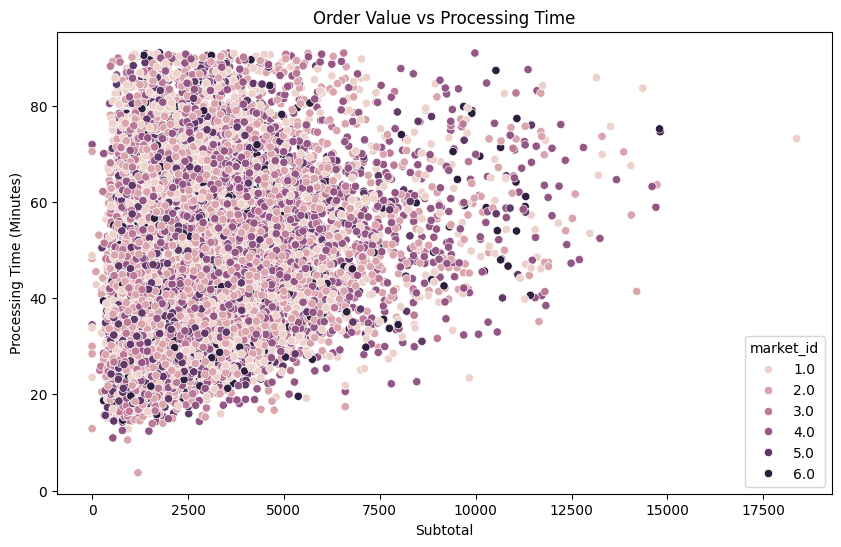

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subtotal', y='processing_time', data=data, hue='market_id')
plt.title('Order Value vs Processing Time')
plt.xlabel('Subtotal')
plt.ylabel('Processing Time (Minutes)')
plt.show()

No correlation

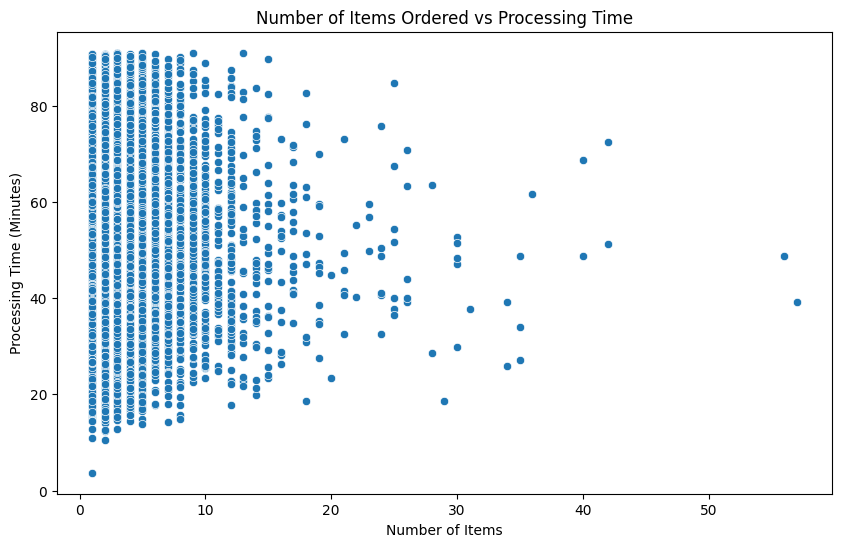

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_items', y='processing_time', data=data)
plt.title('Number of Items Ordered vs Processing Time')
plt.xlabel('Number of Items')
plt.ylabel('Processing Time (Minutes)')
plt.show()

No correlation

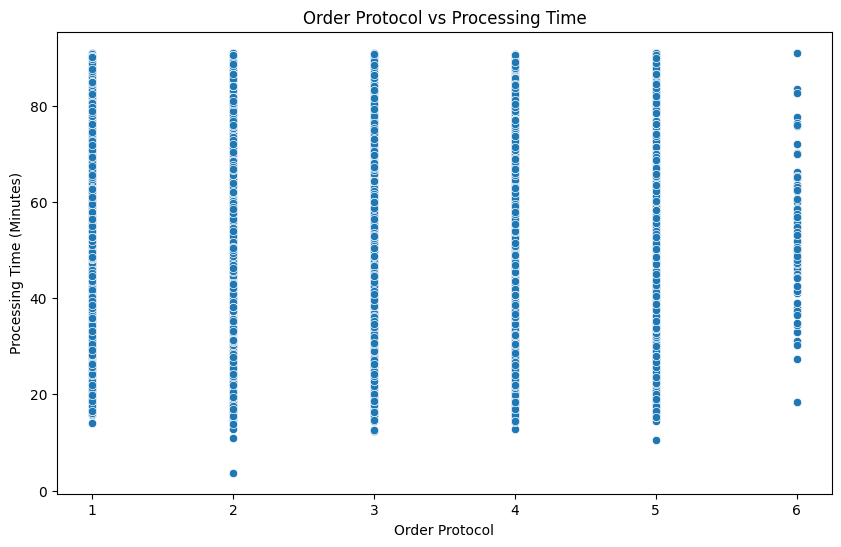

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_protocol', y='processing_time', data=data)
plt.title('Order Protocol vs Processing Time')
plt.xlabel('Order Protocol')
plt.ylabel('Processing Time (Minutes)')
plt.show()

No Correlation

<Axes: xlabel='processing_time', ylabel='Density'>

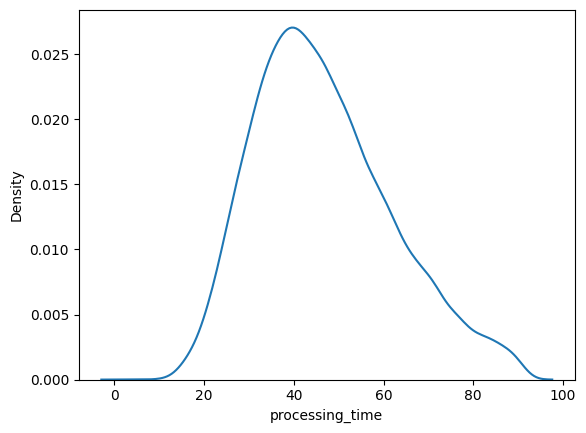

In [ ]:
sns.kdeplot(data=data, x="processing_time")

Distribusi normal

/tmp/ipython-input-1851856012.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(orderprotocol.index, rotation=45, ha='right')


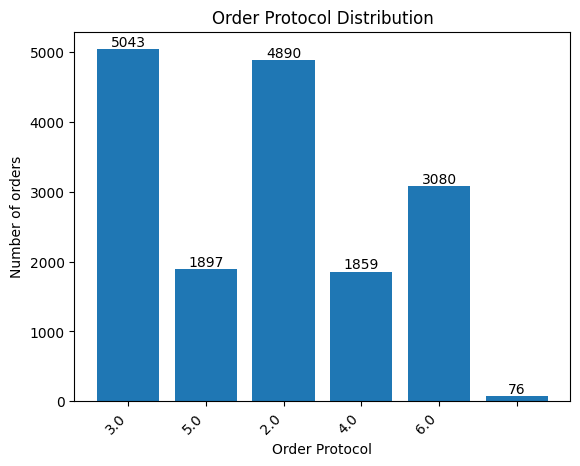

In [ ]:
orderprotocol=data['order_protocol'].value_counts()

fig, ax = plt.subplots()
bars=ax.bar(orderprotocol.index, orderprotocol.values)
ax.set_ylabel("Number of orders")
ax.set_xlabel("Order Protocol")
ax.set_title("Order Protocol Distribution")
ax.bar_label(bars)
ax.set_xticklabels(orderprotocol.index, rotation=45, ha='right')

plt.show()

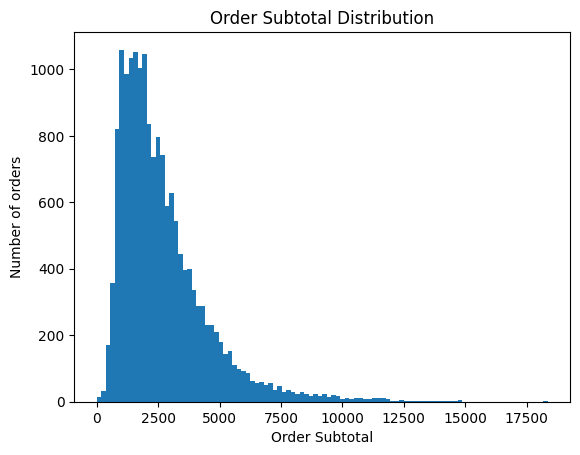

In [ ]:
plt.hist(data['subtotal'], bins=100)
plt.xlabel('Order Subtotal')
plt.ylabel('Number of orders')
plt.title('Order Subtotal Distribution')
plt.show()

Skewed

In [ ]:
data.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


In [ ]:
data_corr=data

In [ ]:
data_corr=data_corr.drop(['store_id','store_primary_category','created_at','actual_delivery_time'], axis=1)

<Axes: >

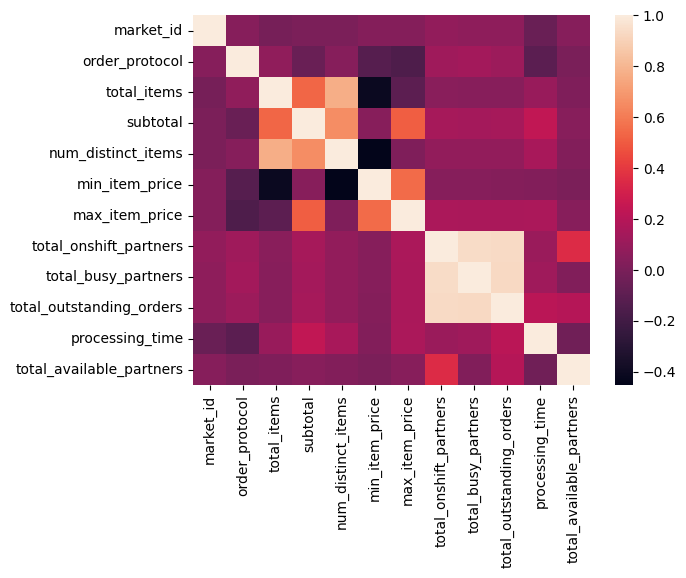

In [ ]:
sns.heatmap(data_corr.corr())

In [ ]:
data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'processing_time',
       'total_available_partners'],
      dtype='object')

# DATA CLEANING

In [ ]:
data_cleaning = data.copy()
data_cleaning.tail(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,processing_time,total_available_partners
17446,2.0,2015-02-04 23:27:23,2015-02-04 23:53:39,816b112c6105b3ebd537828a39af4818,mexican,1.0,2.0,1915.0,2.0,625.0,940.0,20.0,22.0,23.0,26.266667,-2.0
17447,2.0,2015-01-28 23:01:04,2015-01-28 23:45:36,816b112c6105b3ebd537828a39af4818,mexican,1.0,9.0,5405.0,4.0,375.0,995.0,17.0,15.0,15.0,44.533333,2.0
17448,2.0,2015-01-22 02:29:07,2015-01-22 03:25:29,816b112c6105b3ebd537828a39af4818,mexican,1.0,3.0,3414.0,3.0,1098.0,1126.0,92.0,84.0,122.0,56.366667,8.0


In [ ]:
data_cleaning = data_cleaning.drop(columns='total_available_partners')

In [ ]:
data_cleaning.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


In [ ]:
#persentase missing value perkolom
data_cleaning.isna().sum() / len(data_cleaning) * 100

,0
market_id,0.502067
created_at,0.000000
actual_delivery_time,0.000000
store_id,0.000000
store_primary_category,2.598937
order_protocol,0.502067
total_items,0.000000
subtotal,0.000000
num_distinct_items,0.000000
min_item_price,0.000000


In [ ]:
print(len(data_cleaning['order_protocol']) - data_cleaning['order_protocol'].isna().sum())
print(len(data_cleaning['order_protocol']))

16845
16930




---



> *Missing value *


['market_id', 'order_protocol'] DROP, karena sedikit: 0,05%

['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders'] DROP, < 10%. Kalau tdk didrop akibatnya ada minus value.

---

['store_primary_category'] IMPUTASI, diisi dgn modus (kategorikal)


---






In [ ]:
#variable utk kolom yg terdapat missing value

#kolom utk drop
col_drop = ['market_id', 'order_protocol', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

#kolom utk imputasi
col_category_imputed = ['store_primary_category']

In [ ]:
data_cleaning_drop = data_cleaning.copy()

In [ ]:
#drop missing value
data_cleaning_drop = data_cleaning_drop.dropna(subset=col_drop)

In [ ]:
data_cleaning.shape

(16930, 15)

In [ ]:
data_cleaning_drop.shape

(15470, 15)

In [ ]:
data_cleaning_imp = data_cleaning_drop.copy()

In [ ]:
#imputasi missing value

#modus (kategorik)
for col in col_category_imputed:
  mode_value = data_cleaning_imp[col].mode()[0]
  data_cleaning_imp[col] = data_cleaning_imp[col].fillna(mode_value)

#median (numerik)
#for col in col_numeric_imputed:
  #median_value = data_cleaning_imp[col].median()
  #data_cleaning_imp[col] = data_cleaning_imp[col].fillna(median_value)

In [ ]:
data_cleaning_imp.isna().any()

,0
market_id,False
created_at,False
actual_delivery_time,False
store_id,False
store_primary_category,False
order_protocol,False
total_items,False
subtotal,False
num_distinct_items,False
min_item_price,False


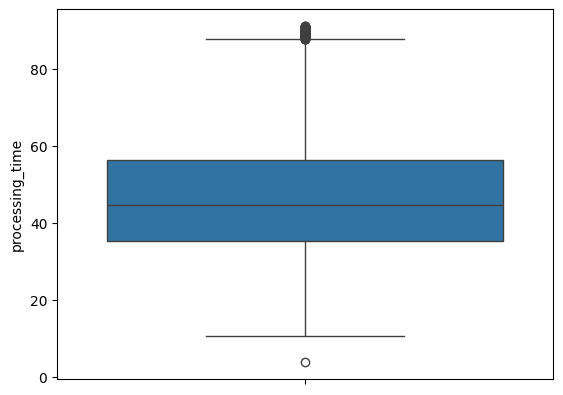

In [ ]:
sns.boxplot(y=data['processing_time'])
plt.show()

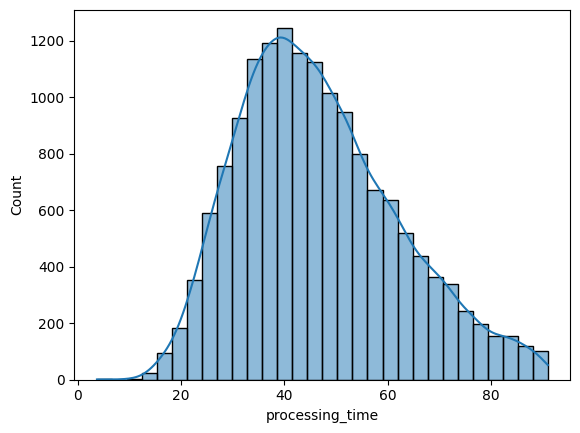

In [ ]:
sns.histplot(data_cleaning_imp['processing_time'], bins=30, kde=True)
plt.show()

In [ ]:
data_cleaning_imp['processing_time'].max()
print(data_cleaning_imp['processing_time'].unique())
data_cleaning_imp['processing_time'].min()

[62.98333333 67.06666667 29.68333333 ... 30.11666667 65.56666667
 90.06666667]


3.716666666666667

Nilai outlier bkn anomali

---



In [ ]:
data_cleaning_imp.duplicated().sum()

np.int64(0)

In [ ]:
data_cleaning_imp.head(4)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,processing_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,51.250000


In [ ]:
data_cleaning_fixed = data_cleaning_imp.copy()

In [ ]:
#cek nilai minus
for cek in data_cleaning_fixed.select_dtypes(include=['int', 'float']).columns:
    count = (data_cleaning_fixed[cek] < 0).sum() / len(data_cleaning_fixed) * 100
    if count > 0:
        print(f"Kolom {cek}: {count:.3f}%")

Kolom min_item_price: 0.013%
Kolom total_onshift_partners: 0.013%
Kolom total_busy_partners: 0.006%
Kolom total_outstanding_orders: 0.006%


In [ ]:
#cek nilai 0
for cek in data_cleaning_fixed.select_dtypes(include=['int', 'float']).columns:
    count = (data_cleaning_fixed[cek] <= 0).sum() / len(data_cleaning_fixed) * 100
    if count > 0:
        print(f"Kolom {cek}: {count:.3f}%")

Kolom subtotal: 0.071%
Kolom min_item_price: 1.545%
Kolom total_onshift_partners: 2.185%
Kolom total_busy_partners: 2.573%
Kolom total_outstanding_orders: 2.540%


In [ ]:
#menghapus nilai minus
kolom_minus = [
    'min_item_price',
    'total_onshift_partners',
    'total_busy_partners',
    'total_outstanding_orders'
]

data_cleaning_fixed = data_cleaning_fixed[(data_cleaning_fixed[kolom_minus] >= 0).all(axis=1)]

In [ ]:
print(len(data_cleaning_imp))
print(len(data_cleaning_fixed))

15470
15464


In [ ]:
data_cleaning_fixed.head(4)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,processing_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,51.250000


In [ ]:
print((data['total_available_partners'] < 0 ).sum() / len(data) * 100)

20.64382752510337


## Kesimpulan Data Cleaning

 Kolom yang didrop missing value:
- 'market_id': 0,05%
- 'order_protocol': 0,05%
- 'total_onshift_partners': 8%
- 'total_busy_partners': 8%
- 'total_outstanding_orders': 8%

< 10% it's ok kalau didrop


Kolom yang diimputasi missing value:
- 'store_primary_category'
diisi dgn modus (kategorikal)

---


Persentase nilai minus di kolomm 'total_available_partners' = 20% (sgt besar), kiranya ini definisi kolomnya gk mengartikan available_partners.


---


Kesimpulan semenatara: Gk pake kolom total_available_partners


---

kolom yg terdapat minus value = [
    'min_item_price',
    'total_onshift_partners',
    'total_busy_partners',
    'total_outstanding_orders'
] Sudah clear


# FEATURE ENGINEERING

In [ ]:
# variable untuk FE (feature engineering)
data_fe = data_cleaning_fixed.copy()

In [ ]:
# encode kolom kategorikal (One Hot Encoding (biner))
df_encoded = pd.get_dummies(data_fe, columns=['store_primary_category'], prefix='store_cat',
                            dtype=int
                            )
df_encoded.head()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,store_cat_seafood,store_cat_singaporean,store_cat_smoothie,store_cat_steak,store_cat_sushi,store_cat_thai,store_cat_turkish,store_cat_vegan,store_cat_vegetarian,store_cat_vietnamese
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,1.0,4.0,3441.0,4.0,557.0,1239.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,2.0,1.0,1900.0,1.0,1400.0,1400.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,1.0,1.0,1900.0,1.0,1900.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,1.0,6.0,6900.0,5.0,600.0,1800.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,1.0,3.0,3900.0,3.0,1100.0,1600.0,...,0,0,0,0,0,0,0,0,0,0


# DATA SCALING

In [ ]:
# drop kolom yang tidak relevan
df_encoded.drop(columns=[
    'market_id',
    'created_at',
    'actual_delivery_time',
    'store_id',
    'order_protocol',
    'total_busy_partners'
], inplace=True)
df_encoded.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_outstanding_orders',
       'processing_time', 'store_cat_afghan', 'store_cat_alcohol',
       'store_cat_american', 'store_cat_asian', 'store_cat_barbecue',
       'store_cat_breakfast', 'store_cat_british', 'store_cat_bubble-tea',
       'store_cat_burger', 'store_cat_burmese', 'store_cat_cafe',
       'store_cat_cajun', 'store_cat_caribbean', 'store_cat_catering',
       'store_cat_chinese', 'store_cat_chocolate', 'store_cat_comfort-food',
       'store_cat_convenience-store', 'store_cat_dessert', 'store_cat_dim-sum',
       'store_cat_ethiopian', 'store_cat_fast', 'store_cat_filipino',
       'store_cat_french', 'store_cat_gastropub', 'store_cat_german',
       'store_cat_gluten-free', 'store_cat_greek', 'store_cat_hawaiian',
       'store_cat_indian', 'store_cat_italian', 'store_cat_japanese',
       'store_cat_korean', 'store_cat_latin-american',
   

In [ ]:
# pisahkan fitur dan target
target = "processing_time"
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# split dataset (sebelum discaling)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# scaling dengan StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
stdr_data = pd.DataFrame(scaled_data, columns=df_encoded.columns)
stdr_data

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_outstanding_orders,processing_time,store_cat_afghan,store_cat_alcohol,...,store_cat_seafood,store_cat_singaporean,store_cat_smoothie,store_cat_steak,store_cat_sushi,store_cat_thai,store_cat_turkish,store_cat_vegan,store_cat_vegetarian,store_cat_vietnamese
0,0.238899,0.412726,0.766790,-0.199680,0.132444,-0.300472,-0.668529,1.060286,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
1,-0.846501,-0.430705,-1.056246,1.381062,0.403619,-1.233977,-1.033535,1.325689,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
2,-0.846501,-0.430705,-1.056246,2.318631,1.245778,-1.233977,-1.071957,-1.104109,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
3,0.962500,2.305929,1.374468,-0.119049,1.077347,-1.233977,-1.033535,0.297656,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
4,-0.122901,0.663949,0.159111,0.818520,0.740483,-1.088117,-0.899059,-0.444391,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15459,0.600700,0.581850,0.766790,-0.503452,-0.202735,1.799915,1.886516,2.100235,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
15460,-0.484701,-0.395129,-0.448568,0.059089,-0.278530,1.479023,1.809672,1.348438,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
15461,-0.484701,-0.422495,-0.448568,-0.072170,-0.371167,-0.679708,-0.630107,-1.326182,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363
15462,2.047900,1.487676,0.766790,-0.540955,-0.278530,-0.767224,-0.783794,-0.138906,-0.021281,-0.082682,...,-0.087689,-0.043346,-0.089542,-0.061886,-0.04024,-0.190584,-0.008042,-0.035986,-0.083472,-0.145363


# MODEL SELECTION

In [ ]:
# dataset untuk modelling
X_train_model = X_train
X_test_model = X_test
y_train_model = y_train
y_test_model = y_test

In [ ]:
#cek datatype train model
print(X_train_model.dtypes)

total_items             float64
subtotal                float64
num_distinct_items      float64
min_item_price          float64
max_item_price          float64
                         ...   
store_cat_thai            int64
store_cat_turkish         int64
store_cat_vegan           int64
store_cat_vegetarian      int64
store_cat_vietnamese      int64
Length: 64, dtype: object


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Daftar model untuk comparison
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge Regression', Ridge(alpha=1.0, random_state=0)))
models.append(('Lasso Regression', Lasso(alpha=0.1, random_state=0)))
models.append(('Decision Tree', DecisionTreeRegressor(random_state=0)))
models.append(('Random Forest', RandomForestRegressor(n_estimators=100, random_state=0)))
models.append(('XGBoost', XGBRegressor(n_estimators=100, random_state=0, verbosity=0)))

In [ ]:
mae_results = []
rmse_results = []
r2_results = []
names = []

# set table untuk performance results
col = ['Algorithm', 'MAE Mean', 'RMSE Mean', 'R² Mean']
model_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

    # MAE scoring
    cv_mae = -cross_val_score(model, X_train_model, y_train_model,
                             cv=kfold, scoring='neg_mean_absolute_error')

    # RMSE scoring
    cv_rmse = -cross_val_score(model, X_train_model, y_train_model,
                              cv=kfold, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(cv_rmse)  # Convert to RMSE

    # R² scoring
    cv_r2 = cross_val_score(model, X_train_model, y_train_model,
                           cv=kfold, scoring='r2')

    mae_results.append(cv_mae)
    rmse_results.append(cv_rmse)
    r2_results.append(cv_r2)
    names.append(name)

    model_results.loc[i] = [name,
                          round(cv_mae.mean(), 2),
                          round(cv_rmse.mean(), 2),
                          round(cv_r2.mean(), 3),
                         ]
    i += 1

# Tampilkan hasil
print("Model Performance Comparison:")
print(model_results.sort_values(by=['R² Mean'], ascending=False))

Model Performance Comparison:
           Algorithm  MAE Mean  RMSE Mean  R² Mean
4      Random Forest     10.96      13.79    0.198
5            XGBoost     10.91      13.80    0.196
1   Ridge Regression     11.09      13.90    0.185
0  Linear Regression     11.09      13.90    0.185
2   Lasso Regression     11.14      13.95    0.179
3      Decision Tree     15.07      19.26   -0.566


Pada tahap Pemilihan Model didapatkan hasil bahwa model XGBoost memiliki performa terbaik, sehingga dibuatlah Model Final menggunakan model XGBoost karena model tersebut memiliki nilai R2 yang paling tinggi (mendekati 1) dan nilai RMSE yang paling rendah (mendekati 0) pada data test yang mana berarti model XGBoost memiliki performa prediksi yang sangat baik dan generalisasi yang baik terhadap data baru.

In [ ]:
# Test Model for XGBoost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
xgboost_regressor = XGBRegressor(n_estimators=100, random_state=0, verbosity=0)

# Fit the model
xgboost_regressor.fit(X_train_model, y_train_model)

# Predict with the model
y_pred_xgboost = xgboost_regressor.predict(X_test_model)

# Calculate metrics
mae_xgboost = mean_absolute_error(y_test_model, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test_model, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
r2_xgboost = r2_score(y_test_model, y_pred_xgboost)

# Print results
print(f" 🔹 XGBoost Regression:")
print(f"   MAE:  {mae_xgboost:.2f} minutes")
print(f"   RMSE: {rmse_xgboost:.2f} minutes")
print(f"   R²:   {r2_xgboost:.4f}")

 🔹 XGBoost Regression:
   MAE:  10.74 minutes
   RMSE: 13.57 minutes
   R²:   0.2155


# HYPERPARAMETER TUNING

##
Di bagian ini, pemilihan model yang akan dituning didasarkan pada evaluasi peforma keseluruhan yang dilakukan di proses sebelumnya (model selection), yang mana diketahui bahwa model XGBoost Regressor, Linear Regression, dan Ridge Regression menunjukkan performa terbaik (top 3), diikuti oleh model Random Forest, Lasso Regression, dan Decision Tree.

Hyperparameter tuning tidak diaplikasikan terhadap model Linear regression karena memang algoritma tersebut tidak memiliki parameter untuk dilakukan proses tuning.

Oleh karenanya, bagian ini memfokuskan proses hyperparameter tuning untuk kedua algoritma lainnya, yakni XGBoost Regressor dan Ridge Regression, membandingkan hasil dari metode hyperparameter tuning GridSearchCV maupun Bayesian Optimization.

Pemilihan metode Bayesian Optimization didasarkan pada uji coba di Maestro Project yang mana parameter yang dihasilkan cenderung menghasilkan skor r2 dan RSME yang lebih superior apabila dibandingkan dengan parameter yang dihasilkan oleh GridSearchCV.

In [ ]:
# dataset untuk hyperparameter tuning
X_train_model = X_train
X_test_model = X_test
y_train_model = y_train
y_test_model = y_test

In [ ]:
# Menginstalasi scikit-optimize untuk melakukan Bayesian Optimization
%pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


## XGBoost Regressor

## Hyperparameter tuning menggunakan GridSearchCV pada model XGBoost Regressor

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Menginisiasi XGBoost Regressor
xgb_reg = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

# Tentukan parameter yang akan dituning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-2, 0, 5), # menampilkan nilai bertipe data float sehingga lebih terperinci
    'max_depth': [3, 5, 7]
}

# Mengaplikasikan hyperparameter tuning menggunakan GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=5,
    scoring='r2', # menampilkan skor r2 terbaik
    n_jobs=-1 # menggunakan banyak core sehingga tuning lebih cepat dan efisien
)

# Mengaplikasikan Grid Search pada data latih
grid_search.fit(X_train_model, y_train_model)

# Menampilkan hasil teroptimal dari metode gridsearchCV
print("Best Parameters: ", grid_search.best_params_)
print("Best R2 Score on CV: ", grid_search.best_score_)

# Mengaplikasikan best model pada data tes
best_model = grid_search.best_estimator_ # Menampilkan parameter terbaik yang didasarkan dari proses mencari best parameters dan best score
y_pred = best_model.predict(X_test_model)

# Menampilkan skor yang dihasilkan oleh best model pada data tes
r2_xgb_grid = r2_score(y_test_model, y_pred)
rmse_xgb_grid = np.sqrt(mean_squared_error(y_test_model, y_pred))

print("R2 Score on test data: ", r2_xgb_grid)
print("RMSE Score on test data: ", rmse_xgb_grid)

Best Parameters:  {'learning_rate': np.float64(0.1), 'max_depth': 3, 'n_estimators': 300}
Best R2 Score on CV:  0.22888072878122948
R2 Score on test data:  0.24553015559853353
RMSE Score on test data:  13.310851968623824


## Hyperparameter tuning menggunakan Bayesian Optimization pada model XGBoost Regressor

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Integer, Real

# Menginisiasi XGBoost Regressor
xgb_reg = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

# Menentukan parameter yang akan dituning untuk XGBoost
param_grid = {
    'n_estimators': Integer(100, 500),
    'learning_rate': Real(1e-2, 1, prior='log-uniform'), # menampilkan nilai bertipe data float sehingga lebih terperinci
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0, prior='uniform'), # menampilkan nilai bertipe data float sehingga lebih terperinci
    'colsample_bytree': Real(0.5, 1.0, prior='uniform')
}

# Menentukan parameter CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Mengaplikasikan hyperparameter tuning menggunakan BayesSearchCV pada data latih
bayesian_search = BayesSearchCV(
    estimator=xgb_reg,
    search_spaces=param_grid,
    n_iter=50,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Mengaplikasikan Bayesian Optimization pada data latih
bayesian_search.fit(X_train_model, y_train_model)

# Menampilkan hasil teroptimal dari metode Bayesian Optimization
print("Best Parameters: ", bayesian_search.best_params_)
print("Best R2 Score on CV: ", bayesian_search.best_score_)

# Mengaplikasikan best model pada data tes
best_model = bayesian_search.best_estimator_
y_pred = best_model.predict(X_test_model)

# Menampilkan skor yang dihasilkan oleh best model pada data tes
r2_xgb_bayes = r2_score(y_test_model, y_pred)
rmse_xgb_bayes = np.sqrt(mean_squared_error(y_test_model, y_pred))

print("Skor R2 pada data tes: ", r2_xgb_bayes)
print("Skor RMSE pada data tes: ", rmse_xgb_bayes)

Best Parameters:  OrderedDict({'colsample_bytree': 0.9743405001811525, 'learning_rate': 0.0246108264924055, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8207915907930954})
Best R2 Score on CV:  0.24313480401720025
Skor R2 pada data tes:  0.2558800040008371
Skor RMSE pada data tes:  13.219237282337664


## Komparasi kedua metode hyperparameter tuning pada model XGBoost Regressor

In [ ]:
# Komparasi skor r2 dari kedua metode hyperparameter tuning

if r2_xgb_grid > r2_xgb_bayes:
    print("skor r2 menggunakan gridsearchcv lebih optimal")
elif r2_xgb_grid < r2_xgb_bayes:
    print("skor r2 menggunakan bayesian optimization lebih optimal")
else:
    print("keduanya sama optimalnya")

skor r2 menggunakan bayesian optimization lebih optimal


In [ ]:
# Komparasi skor RMSE dari kedua metode hyperparameter tuning

if rmse_xgb_grid < rmse_xgb_bayes:
    print("skor rmse menggunakan gridsearchcv lebih terminimalisasi")
elif rmse_xgb_grid > rmse_xgb_bayes:
    print("skor rmse menggunakan bayesian optimization lebih terminimalisasi")
else:
    print("keduanya sama terminimalisasinya")

skor rmse menggunakan bayesian optimization lebih terminimalisasi


## Ridge Regression

## Hyperparameter tuning menggunakan GridSearchCV pada model Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Memilih model yang sudah didefinisikan di proses sebelumnya
Ridge_reg = Ridge()
model = Ridge_reg.fit(X_train_model, y_train_model)

# Menentukan parameter yang akan dituning
param_grid = {'alpha': np.logspace(-4, 4, 20), # menampilkan nilai alpha bertipe data float sehingga lebih terperinci
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']}

# Mengaplikasikan hyperparameter tuning menggunakan gridsearchCV pada data latih
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='r2', # menampilkan skor r2 terbaik
    n_jobs=-1 # menggunakan banyak core sehingga tuning lebih cepat dan efisien
    )

grid_search.fit(X_train_model, y_train_model)

# Menampilkan hasil teroptimal dari metode gridsearchCV
print("Best Nilai Alpha dan Solver: ", grid_search.best_params_) # Menampilkan parameter terbaik yang didasarkan dari proses mencari best parameters dan best score
print("Best Skor R2 pada CV: ", grid_search.best_score_)

# Mengaplikasikan best model pada data tes
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_model)

# Menampilkan skor yang dihasilkan oleh best model pada data tes
r2_ridge_grid = r2_score(y_test_model, y_pred)
rmse_ridge_grid = np.sqrt(mean_squared_error(y_test_model, y_pred))

print("Skor R2 pada data tes: ", r2_ridge_grid)
print("Skor RMSE pada data tes: ", rmse_ridge_grid)



Best Nilai Alpha dan Solver:  {'alpha': np.float64(11.288378916846883), 'solver': 'svd'}
Best Skor R2 pada CV:  0.18610954455022571
Skor R2 pada data tes:  0.19675238300273767
Skor RMSE pada data tes:  13.734398162585043


## Hyperparameter tuning menggunakan Bayesian Optimization pada model Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Memilih model yang sudah didefinisikan di proses sebelumnya
Ridge_reg = Ridge()
model = Ridge_reg.fit(X_train_model, y_train_model)

# Menentukan parameter yang akan dituning
search_space = {
    'alpha': Real(1e-4, 1e4, prior='log-uniform'), # menampilkan nilai alpha bertipe data float sehingga lebih terperinci
    'solver': Categorical(['auto', 'svd', 'cholesky', 'lsqr', 'sag'])
}

# Mengaplikasikan hyperparameter tuning menggunakan bayesian optimization pada data latih
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1, # menggunakan banyak core sehingga tuning lebih cepat dan efisien
    scoring='r2' # menampilkan best r2 score
)

bayes_search.fit(X_train_model, y_train_model)

# Menampilkan hasil teroptimal dari metode bayesian optimization
print("Best Nilai Alpha dan Solver: ", bayes_search.best_params_)
print("Best Nilai R2 pada CV: ", bayes_search.best_score_)

# Mengaplikasikan best model pada data tes
best_model = bayes_search.best_estimator_ # Menampilkan parameter terbaik yang didasarkan dari proses mencari best parameters dan best score
y_pred = best_model.predict(X_test_model)

# Menampilkan skor yang dihasilkan oleh best model pada data tes
r2_ridge_bayes = r2_score(y_test_model, y_pred)
rmse_ridge_bayes = np.sqrt(mean_squared_error(y_test_model, y_pred))

print("Skor R2 pada data tes: ", r2_ridge_bayes)
print("Skor RMSE pada data tes: ", rmse_ridge_bayes)

Best Nilai Alpha dan Solver:  OrderedDict({'alpha': 17.26047250942033, 'solver': 'auto'})
Best Nilai R2 pada CV:  0.186141678118128
Skor R2 pada data tes:  0.19703064414456117
Skor RMSE pada data tes:  13.732019020540818


## Komparasi kedua metode hyperparameter tuning pada model Ridge Regression

In [ ]:
# Komparasi skor r2 dari kedua metode

if r2_ridge_grid > r2_ridge_bayes:
    print("skor r2 menggunakan gridsearchcv lebih optimal")
elif r2_ridge_grid < r2_ridge_bayes:
    print("skor r2 menggunakan bayesian optimization lebih optimal")
else:
    print("keduanya sama optimalnya")


skor r2 menggunakan bayesian optimization lebih optimal


In [ ]:
# Komparasi skor RMSE dari kedua metode

if rmse_ridge_grid < rmse_ridge_bayes:
    print("skor rmse menggunakan gridsearchcv lebih terminimalisasi")
elif rmse_ridge_grid > rmse_ridge_bayes:
    print("skor rmse menggunakan bayesian optimization lebih terminimalisasi")
else:
    print("keduanya sama terminimalisasinya")

skor rmse menggunakan bayesian optimization lebih terminimalisasi


## Model XGBoost Regressor yang sudah dihyperparameter tuning

In [ ]:
from xgboost import XGBRegressor

model_xgb_tuned = XGBRegressor(
    learning_rate=0.0246108264924055,
    max_depth=6,
    n_estimators=500,
    subsample=0.8207915907930954,
    colsample_bytree=0.9743405001811525)

## Kesimpulan

#### Dengan menggunakan data saat ini untuk pemodelan XGBoost Regressor, metode hyperparameter tuning yang paling optimal adalah dengan menggunakan Bayesian Optimization. Berikut adalah rangkuman hasil parameter terbaik untuk masing-masing metode tersebut.





#### XGBOOST REGRESSOR
#### Metode GridSearchCV
#### Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


#### Metode Bayesian Optimization
#### Best Parameters:  {'learning_rate': 0.0246108264924055, 'max_depth': 6, 'n_estimators': 500}

#### Catatan: Model XGBoost Regressor menghasilkan skor r2 yang jauh lebih optimal dan skor RMSE yang termininalisasi apabila dibandingkan dengan model Linear Regression dan Ridge Regression, sehingga model ini menjadi pilihan utama sejauh ini.

#### Setelah dilakukan proses hyperparameter tuning, metode Bayesian Optimization menghasilkan skor r2 dan RMSE yang lebih superior.

# Saving to Pickle

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBRegressor
import joblib
import numpy as np

In [ ]:
class DropColumns(BaseEstimator, TransformerMixin):
    def _init_(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.columns, axis=1, errors='ignore')

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df = df.dropna(subset=['created_at','actual_delivery_time'])
df['processing_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

/tmp/ipython-input-3505475386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processing_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


In [ ]:
y = df['processing_time']
X = df.drop(columns=['processing_time'])

In [ ]:
drop_cols = ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'order_protocol', 'total_busy_partners']
cat_cols = ['store_primary_category']
num_cols = [col for col in X.columns if col not in cat_cols + drop_cols]

In [ ]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [ ]:
pipe = Pipeline([
    ('drop_cols', DropColumns(drop_cols)),
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=419,
        learning_rate=0.040387067707572624,
        max_depth=8,
        colsample_bytree=0.9300245720147507,
        subsample=0.7188091248496163,
        random_state=42
    ))
])

TypeError: DropColumns() takes no arguments

In [ ]:
pipe.fit(X, y)
joblib.dump(pipe, 'processing_time_model.pkl')
print("Pipeline dan model XGBoost berhasil disimpan sebagai 'processing_time_model.pkl'")

In [ ]:
!pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download("requirements.txt")